# Astropy Tutorial 
I am following the tutorials from the Astropy's website for learning how to work with [astropy](https://learn.astropy.org/). <br>
First, I am doing the tutorial on [Viewing and Manipulating Files](https://learn.astropy.org/).

In [24]:
import numpy as np
import matplotlib.pyplot as plt

import cmasher as cms

from astropy.io import fits
from astropy.utils.data import download_file
import astropy.units as u
from astropy.constants import G, h, k_B
from astropy.visualization import quantity_support

In [9]:
hdu_list = fits.open('HorseHead.fits')
hdu_list.info()

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [13]:
image_data = hdu_list[0].data
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


In [15]:
# important to close fits file because so that it doesn't use up excess memory
hdu_list.close() 

### Viewing the image data and getting basic statistics

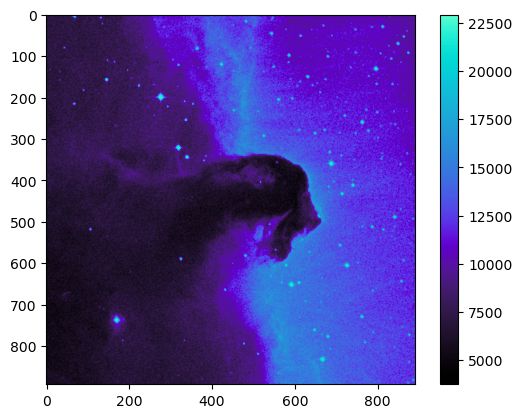

In [22]:
cmap = cms.cosmic
plt.imshow(image_data, cmap=cmap)
plt.colorbar()

# Synthetic Images from Simulated Data
Now I am following this [tutorial](https://learn.astropy.org/tutorials/synthetic-images.html)

In [3]:
file_i = 'synchrotron_i_lobe_0700_150MHz_sm.fits'
hdulist = fits.open(file_i)
hdulist.info()

Filename: synchrotron_i_lobe_0700_150MHz_sm.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  NN_EMISSIVITY_I_LOBE_150.0MHZ    1 ImageHDU        23   (1024, 1452)   float64   


In [4]:
hdu = hdulist[1]
hdu.header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                 1452                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'NN_EMISSIVITY_I_LOBE_150.0MHZ' / extension name                      
BTYPE   = 'nn_emissivity_i_lobe_150.0MHz'                                       
BUNIT   = 'Jy/arcsec**2'                                                        
WCSAXES =                    2                                                  
CRPIX1  =                512.0                                                  
CRPIX2  =                726

129.7177858088622
0.0


(array([7.9600e+02, 9.4800e+02, 1.1640e+03, 9.6200e+02, 1.0230e+03,
        1.0540e+03, 9.4000e+02, 1.3540e+03, 1.0310e+03, 9.1100e+02,
        1.2370e+03, 1.4230e+03, 1.3950e+03, 1.0830e+03, 1.1290e+03,
        1.2960e+03, 1.8520e+03, 1.6690e+03, 1.5450e+03, 1.9950e+03,
        2.2440e+03, 1.9560e+03, 2.1080e+03, 2.0700e+03, 2.1950e+03,
        2.3500e+03, 2.3410e+03, 2.7820e+03, 2.7520e+03, 2.8860e+03,
        3.2800e+03, 3.4590e+03, 3.9880e+03, 4.4580e+03, 4.4560e+03,
        5.0010e+03, 5.7560e+03, 6.6540e+03, 7.0350e+03, 7.5390e+03,
        8.3780e+03, 8.7360e+03, 9.6870e+03, 9.8300e+03, 1.1422e+04,
        1.1617e+04, 1.2080e+04, 1.2814e+04, 1.3154e+04, 1.3338e+04,
        1.2610e+04, 1.2483e+04, 1.3766e+04, 1.2622e+04, 1.4412e+04,
        1.4697e+04, 1.4599e+04, 1.6707e+04, 1.6113e+04, 1.6858e+04,
        1.6610e+04, 1.6482e+04, 1.8916e+04, 1.5492e+04, 1.3465e+04,
        1.3285e+04, 1.2338e+04, 1.0455e+04, 8.0180e+03, 8.0420e+03,
        5.8900e+03, 4.7180e+03, 4.0540e+03, 4.25

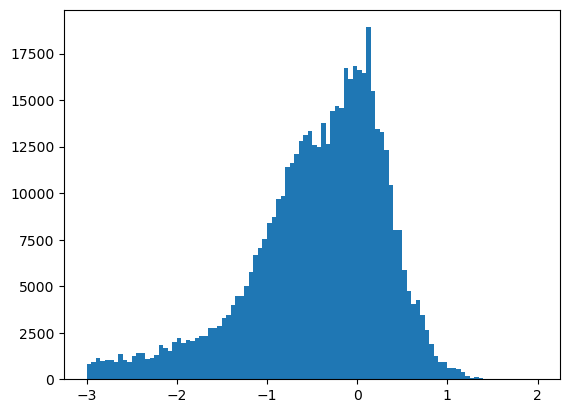

In [5]:
print(hdu.data.max())
print(hdu.data.min())
np.seterr(divide='ignore')
plt.hist(np.log10(hdu.data.flatten()), range=(-3, 2), bins=100)

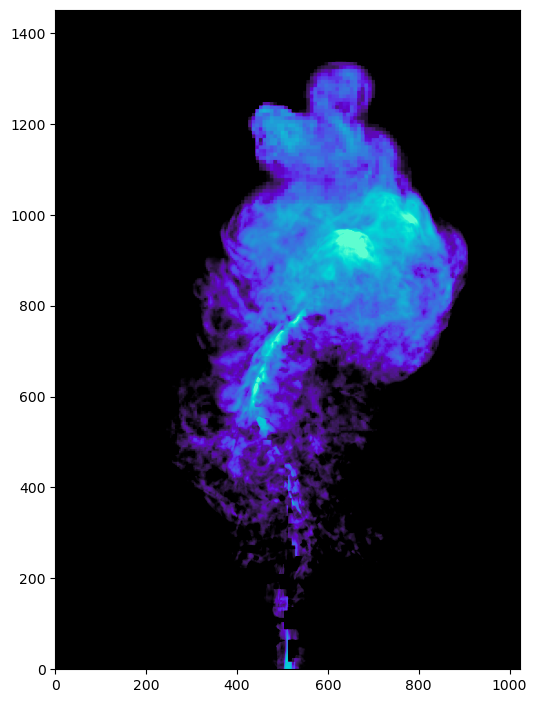

In [6]:
fig = plt.figure(figsize=(6, 12))
fig.add_subplot(111)
cmap = cms.cosmic
plt.imshow(np.log10(hdu.data+1E-3), cmap=cmap, vmin=-1, vmax=1, origin='lower')

## Set up astrometry coordinates

In [7]:
dist_obj = 200 * u.Mpc

ra_obj = '19h59m28.3566s'
dec_obj = '+40d44m02.096s'

In [8]:
cdelt1 = ((hdu.header['CDELT1'] * u.cm / dist_obj.to('cm')) * u.rad).to('deg')
cdelt2 = ((hdu.header['CDELT2'] * u.cm / dist_obj.to('cm')) * u.rad).to('deg')

print(cdelt1, cdelt2)

8.74922223983974e-06 deg 8.74922223983974e-06 deg


In [9]:
w = WCS(naxis=2)

w.wcs.crpix = [hdu.data.shape[0]/2,hdu.data.shape[1]/2]

w.wcs.cdelt = [-cdelt1.base, cdelt2.base]

c = SkyCoord(ra_obj, dec_obj)
w.wcs.crval = [c.ra.deg, c.dec.deg]

w.wcs.cunit = ['deg', 'deg']

In [10]:
# convert the WCS corrdinate into header and update the hdu
wcs_header = w.to_header()
hdu.header.update(wcs_header)

In [11]:
hdu.header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                 1452                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'NN_EMISSIVITY_I_LOBE_150.0MHZ' / extension name                      
BTYPE   = 'nn_emissivity_i_lobe_150.0MHz'                                       
BUNIT   = 'Jy/arcsec**2'                                                        
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                726.0 / Pixel coordinate of reference point            
CRPIX2  =                512

In [16]:
wcs = WCS(hdu.header)

fig = plt.figure(figsize=(6,12))
fig.add_subplot(111, projection=wcs)
plt.imshow(np.log10(hdu.data+1e-3), vmin=-1, vmax=1, origin='lower')
plt.xlabel('RA')
plt.ylabel('Dec')


# For some reason, this does not seem to work.
# I tried updating matplotlib and astropy, yet it still did not work 

TypeError: WCSAxes.__init__() got multiple values for argument 'wcs'

<Figure size 600x1200 with 0 Axes>

# Prepare a Point Spread Function (PSF)

In [17]:
# assume telescope resolution
telescope_resolution = 1 * u.arcsecond

sigma = telescope_resolution.to('deg') / cdelt2

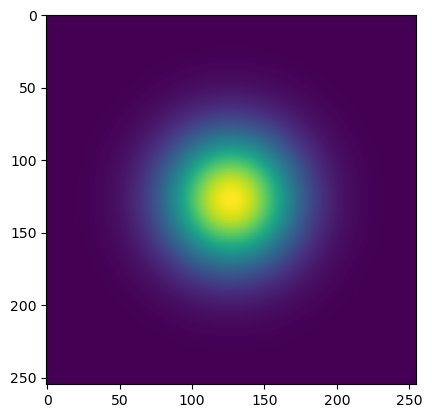

In [20]:
psf = Gaussian2DKernel(sigma)
plt.imshow(psf.array.value)

# Convolve image with PSF

In [21]:
convolved_image = convolve_fft(hdu_data, psf, boundary='wrap')

delta_x_pdf = 100
xmin, xmax = -psf.shape[1] - delta_x_psf, -delta_x_psf
ymin, ymax = detla_x_psf, delta_x_psf + psf.shape[0]
convolved_image[xmin:xmax, ymin:ymax] = psf.array / psf.array.max()*10

NameError: name 'hdu_data' is not defined

In [22]:
wcs = WCS(hdu.header)
fig = plt.figure(figsize=(8, 12))
i_plot = fig.add_subplot(111, projection=wcs)
plt.imshow(np.log10(convolved_image+1e-3), vmin=-1, vmax=1.0, origin='lower')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar()

TypeError: WCSAxes.__init__() got multiple values for argument 'wcs'

<Figure size 800x1200 with 0 Axes>

# Using Astropy quantities and units
Here, I am following this [tutorial](https://learn.astropy.org/tutorials/quantities.html#Measuring-The-Column-Density-of-CO)

In [25]:
Reff = 29 * u.pc        # half-light radius of the galaxy

In [29]:
print("""Half light radius
value: {0.value}
unit: {0.unit}""".format(Reff))

Half light radius
value: 29.0
unit: pc


In [31]:
print("{0:.3g}".format(Reff.to(u.m)))   # convert radius from parsec to meter

8.95e+17 m


In [38]:
vmean = 206
sigin = 4.3
v = np.random.normal(vmean, sigin, 500) * u.km / u.s

In [40]:
print("""First 10 radial velocity measurements: 
{0}
{1}""".format(v[:10], v.to(u.m/u.s)[:10]))

First 10 radial velocity measurements: 
[197.90042039 208.22456574 207.09335183 201.66699668 212.05356445
 208.33580193 208.61773682 203.3273908  204.85554729 199.0428916 ] km / s
[197900.42039447 208224.56574151 207093.35183469 201666.9966823
 212053.5644489  208335.8019262  208617.73681891 203327.39079585
 204855.54729086 199042.89159816] m / s


In [35]:
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7e6363f051d0>

Text(0, 0.5, 'N')

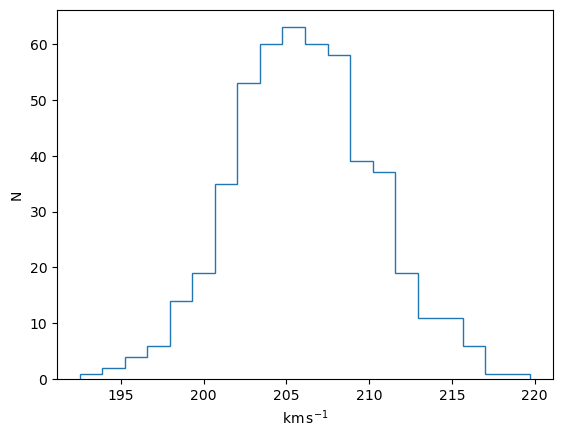

In [39]:
plt.figure()
plt.hist(v, bins='auto', histtype='step')
plt.ylabel("N")

In [41]:
sigma = np.sqrt(np.sum((v - np.mean(v))**2) / np.size(v))
print("Velocity dispersion: {0:.2f}".format(sigma))

Velocity dispersion: 4.28 km / s


In [42]:
sigma_scalar = np.sqrt(np.sum((v - np.mean(v))**2) / len(v))

In [43]:
M = 4*sigma**2*Reff/G
M

<Quantity 3.1828033e+13 kg km2 pc / m3>

In [44]:
M.decompose()

<Quantity 9.8211048e+35 kg>

### Using Quantities with functions

In [47]:
def response_func(xinarcsec, yinarcsec):
    xscale = 0.9
    yscale = 0.85
    xfactor = 1 / (1 + xinarcsec/xscale)
    yfactor = 1 / (1 + yinarcsec/yscale)
    return xfactor * yfactor

In [48]:
response_func(1.0, 1.2)

0.19640564826700893

In [53]:
def response_func(x, y):
    xscale = 0.9 * u.arcsec
    yscale = 0.85 * u.arcsec
    xfactor = 1 / (1 + x/xscale)
    yfactor = 1 / (1 + y/yscale)
    
    return xfactor * yfactor

In [56]:
response_func(1.0*u.arcmin, 1.2*u.arcmin)

<Quantity 0.00017243>